**Created by Berkay Alan**

**Non-Linear Models - Regression | Decision Trees (CART)**

**3 August 2021**

**For more Tutorial:** https://github.com/berkayalan

## Content



- Regression(Decision) Trees (CART) (Theory - Model- Tuning)

**Check out My Github for other Regression Models**

Github Repository Including:

K - Nearest Neighbors(KNN) (Theory - Model- Tuning)

Ensemble Learning - Bagged Trees(Bagging) (Theory - Model- Tuning)

Ensemble Learning - Random Forests (Theory - Model- Tuning)

Gradient Boosting Machines(GBM) (Theory - Model- Tuning)

Light Gradient Boosting Machines(LGBM) (Theory - Model- Tuning)

XGBoost(Extreme Gradient Boosting) (Theory - Model- Tuning)

Catboost (Theory - Model- Tuning)

Check it out: https://github.com/berkayalan/Data-Science-Tutorials/blob/master/Non-Linear%20Models%20-%20Regression.ipynb

For more Tutorial: https://github.com/berkayalan

## Resources

- **The Elements of  Statistical Learning** - Trevor Hastie,  Robert Tibshirani, Jerome Friedman -  Data Mining, Inference, and Prediction (Springer Series in Statistics) 


- [**Understanding Confusion Matrix**](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

- [**Classification And Regression Trees for Machine Learning**](https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/)

- [**Regression Trees by Statquest**](https://www.youtube.com/watch?v=g9c66TUylZ4&ab_channel=StatQuestwithJoshStarmer)

- [**Decision Tree Algorithm, Explained**](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html)

## Importing Libraries

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import statsmodels.api as sm

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
pip install skompiler

In [ ]:
from skompiler import skompile

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
from sklearn import model_selection

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,BaseEnsemble,GradientBoostingRegressor

In [ ]:
pip install astor

In [ ]:
import astor

In [ ]:
import time

## Regression(Decision) Trees (CART)

### Theory

Decision Trees are an important type of algorithm for predictive modeling machine learning. Regression Trees are a type of Decision Trees.

The representation for the CART model is a binary tree. Each root node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

**Lockdown Example**

For example, I tried to generate a guide for citizens in the big cities about
going-out permissions during Covid-19 Pandemic. For the sake of simplicity, the users are adult
citizens who are older than 20 years.

The guide first checks the age of the citizen. If the citizen is 65+, then it checks if it is an Out-Day-
For65+. A 65+ user is allowed to go out only if it is an Out-Day-For-65+, otherwise he/she is
not allowed to go out.

If the age of the citizen is not 65+, then the guide checks if that day is a Lockdown-Day. If it is not a
lockdown day, this younger citizen is allowed to go out. However, if it is a lockdown day, the
younger citizens can go out only if he/she accompanies a 65+ person. Otherwise he is not allowed to go out.

In this example, *Age of Citizen* is **root node** at the beginning of a tree. It represents entire population being analyzed. From the root node, the population is divided according to age.

*Allowed to go out* and *Not allowed to go out* is **Leaf(Terminal) Node** that does not split anything.Splitting is a process of dividing a node into two or more sub-nodes.

**Parent and Child Node** is a node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

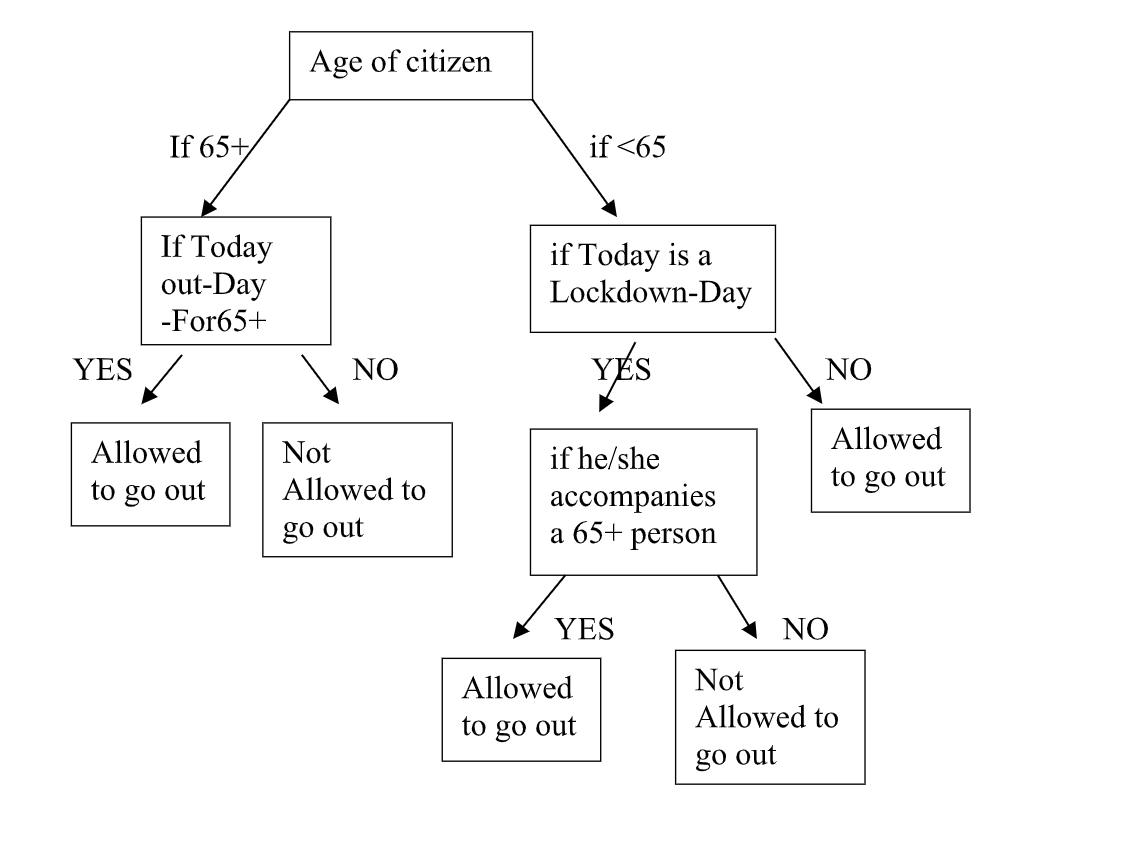

The Regression Tree (CART) algorithm provides a foundation for important algorithms like bagged decision trees, random forest and boosted decision trees.


### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [ ]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

Now we will remove NA values.

In [ ]:
hts.dropna(inplace=True)

We will do **One Hot Encoding** to categorical columns.

In [ ]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

In [ ]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [ ]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

In [ ]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [ ]:
hts.shape

In [ ]:
#Independent Variables
X.shape

In [ ]:
#Dependent Variables
y.shape

In [ ]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

In [ ]:
X_train = pd.DataFrame(X_train.Hits)
X_test = pd.DataFrame(X_test.Hits)

In [ ]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=15).fit(X_train,y_train)

In [ ]:
cart_model

In [ ]:
plt.figure(figsize=(20,5))
x_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(X_train,y_train,color="blue")
plt.plot(x_grid,cart_model.predict(x_grid),color="red")
plt.title("Cart Regression Tree")
plt.xlabel("Hits")
plt.ylabel("Salary")
plt.show()


Let's build a decision rule to see better.

In [ ]:
print(skompile(cart_model.predict).to("python/code"))

### Prediction

In [ ]:
x= [140]

In [ ]:
((2127.333 if x[0] <= 14.0 else 219.1551724137931 if x[0] <= 54.5 else 
    1300.0 if x[0] <= 55.5 else 369.7562688172043) if x[0] <= 115.5 else ((
    (631.6666666666666 if x[0] <= 122.5 else 1468.5236666666667 if x[0] <= 
    125.5 else 826.8055) if x[0] <= 129.5 else 589.34995) if x[0] <= 143.0 else
    (935.646 if x[0] <= 150.5 else 2460.0) if x[0] <= 151.5 else 
    540.8333333333334 if x[0] <= 158.5 else (910.2526086956523 if x[0] <= 
    191.0 else 1279.1666666666667) if x[0] <= 211.5 else 365.0) if x[0] <= 
    230.5 else 1975.0)

In [ ]:
cart_model

In [ ]:
y_pred=cart_model.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=cart_model.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

### Model Tuning

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [ ]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

Now we will remove NA values.

In [ ]:
hts.dropna(inplace=True)

We will do **One Hot Encoding** to categorical columns.

In [ ]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

In [ ]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [ ]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

In [ ]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [ ]:
hts.shape

In [ ]:
#Independent Variables
X.shape

In [ ]:
#Dependent Variables
y.shape

In [ ]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

In [ ]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)

In [ ]:
cart_params = {"max_leaf_nodes": [2,5,7,10,15],
               "min_samples_split" : [5,9,11,15,19,25,30,45],
               "min_samples_leaf": [2,5,7,10,15],
               "max_depth": [3,5,8,11,15]
              }

In [ ]:
cart_cv_model= GridSearchCV(cart_model,cart_params,cv=15).fit(X_train,y_train)

In [ ]:
cart_cv_model.best_params_

In [ ]:
tuned_cart_model = DecisionTreeRegressor(max_leaf_nodes=cart_cv_model.best_params_['max_leaf_nodes'],
                                         min_samples_leaf=cart_cv_model.best_params_['min_samples_leaf'],
                                         min_samples_split=cart_cv_model.best_params_['min_samples_split'],
                                         max_depth=cart_cv_model.best_params_['max_depth']).fit(X_train,y_train)

In [ ]:
y_pred=tuned_cart_model.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=tuned_cart_model.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)